In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import sweetviz
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


# Read Dataset

In [2]:
df=pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# EDA With Sweetviz

In [3]:
#my_report=sweetviz.analyze([df,"data"])

In [4]:
#my_report.show_html("Report.html")

In [5]:
df.shape

(1338, 7)

In [6]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Exploratory Data Analysis

# Missind Data

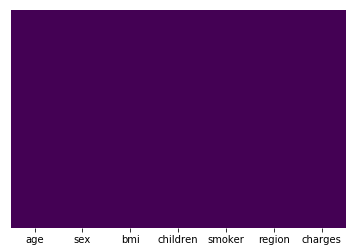

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
num=0
for i in df.columns:
    print(i,num)
    num+=1

age 0
sex 1
bmi 2
children 3
smoker 4
region 5
charges 6


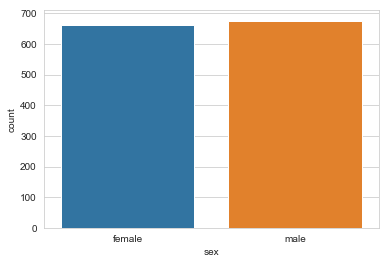

In [10]:
sns.set_style("whitegrid")
sns.countplot(x="sex",data=df)

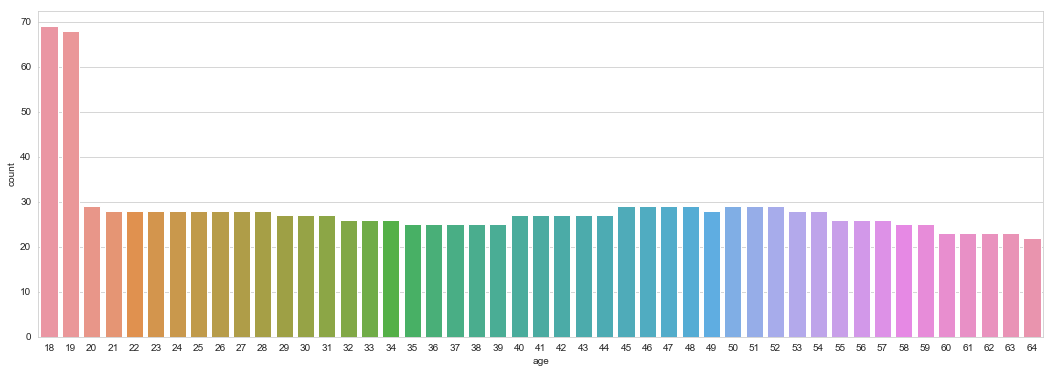

In [11]:
plt.figure(figsize=(18,6))
sns.set_style("whitegrid")
sns.countplot(x="age",data=df)

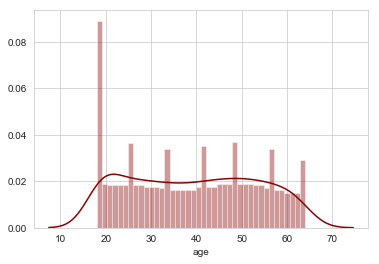

In [12]:
sns.set_style("whitegrid")
sns.distplot(df["age"],kde=True,bins=40,color="darkred")

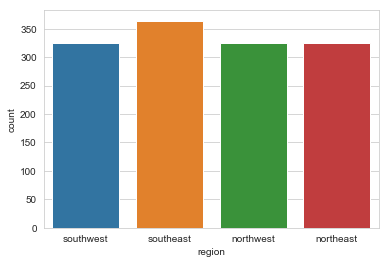

In [13]:
sns.set_style("whitegrid")
sns.countplot(df["region"]) 

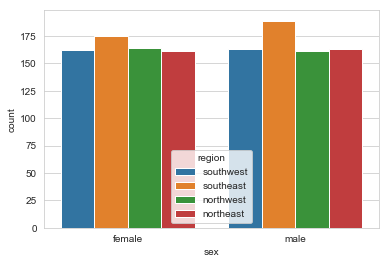

In [14]:
sns.set_style("whitegrid")
sns.countplot(x="sex",hue="region",data=df) 

In [15]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

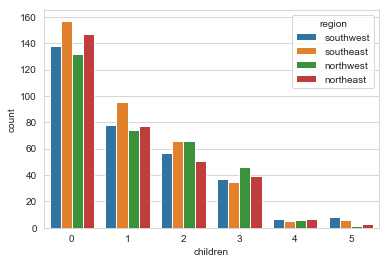

In [16]:
sns.set_style("whitegrid")
sns.countplot(x="children",hue="region",data=df)

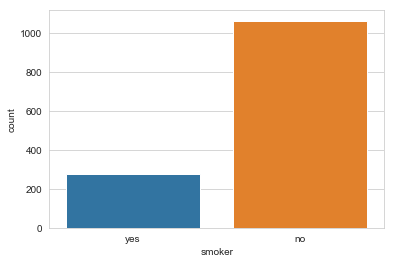

In [17]:
sns.countplot(x="smoker",data=df)

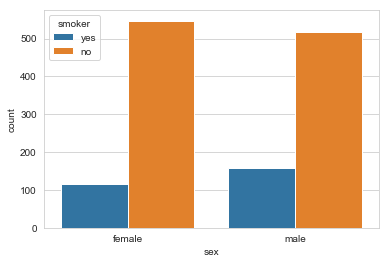

In [18]:
sns.countplot(x="sex",hue="smoker",data=df)

# BMI is a ratio that is used by life insurance companies to estimate individual’s health and fitness condition

In [19]:
mean=np.mean(df["bmi"])
mean1=np.min(df["bmi"])
mean2=np.max(df["bmi"])
print("This is mean of bmi=",mean)
print("This is min  of bmi=",mean1)
print("This is max  of bmi=",mean2)

This is mean of bmi= 30.663396860986538
This is min  of bmi= 15.96
This is max  of bmi= 53.13


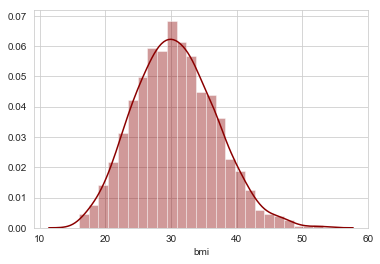

In [20]:
sns.distplot(df["bmi"],color="darkred")

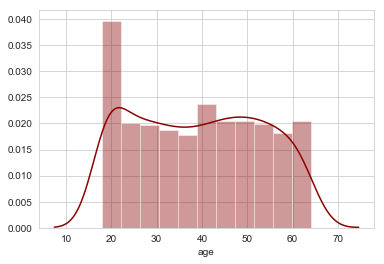

In [21]:
sns.distplot(df["age"],color="darkred")

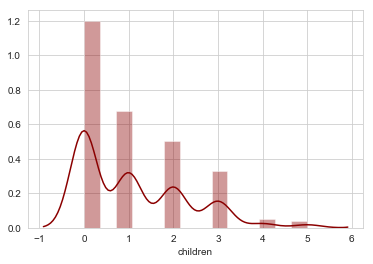

In [22]:
sns.distplot(df["children"],color="darkred")

In [23]:
mean_age=np.mean(df["age"])
mean

30.663396860986538

In [24]:
#df["ages"]=stats.zscore(df["age"])

# Find_Outliars

In [25]:
outliars=[]
def detect_outliar(data):
    threshold=3
    mean_age=np.mean(data)
    std_age=np.std(data)
    
    for v in data:
        z_score=(v-mean_age)/std_age
        if z_score > threshold:
            outliars.append(v)
            
    return outliars

In [26]:
detect_outliar(df["children"])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

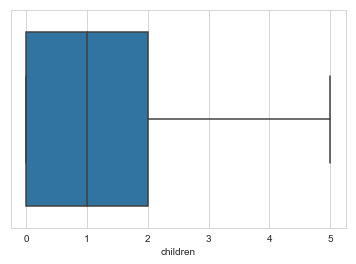

In [27]:
sns.boxplot(x="children",data=df)

In [28]:
df["children"].replace(to_replace =5,value =1,inplace=True) 

In [29]:
del outliars[0:]

In [30]:
detect_outliar(df["children"])

[]

In [31]:
del outliars[0:]

In [32]:
detect_outliar(df["bmi"])

[49.06, 50.38, 52.58, 53.13]

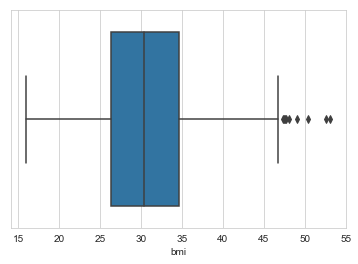

In [33]:
sns.boxplot(x="bmi",data=df)

In [34]:
df["bmi"].replace(to_replace=[49.06, 50.38, 52.58, 53.13],value=30,inplace=True) 

In [35]:
del outliars[0:]

In [36]:
detect_outliar(df["bmi"])

[]

In [37]:
detect_outliar(df["age"])

[]

# Data Convert into Gaussian distribution

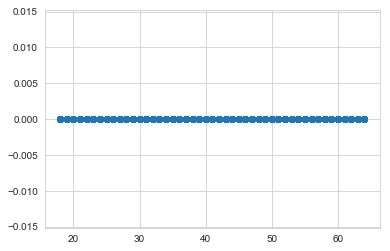

In [38]:
plt.scatter(x=df["age"],y=np.zeros_like(df["age"]))

In [39]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    

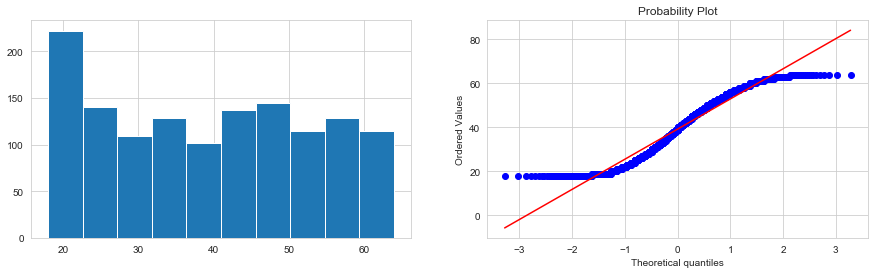

In [40]:
diagnostic_plots(df,'age')

Optimal lambda:  0.6208438941944457


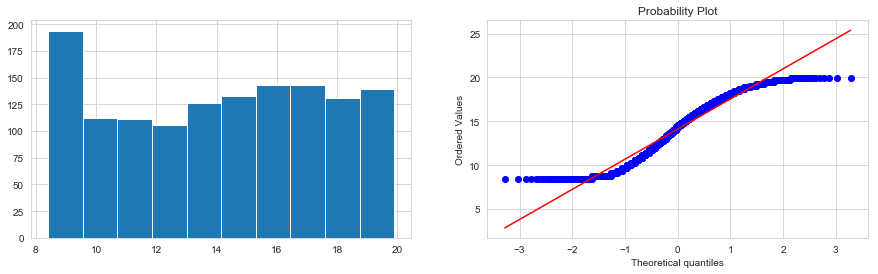

In [41]:
df['Age'], param = stats.boxcox(df.age+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Age')

# Categorical Data Handling

# Label Encoding,OneHotEncoding

In [42]:
for obj in df.select_dtypes(include=["object"]):
    print(obj)

sex
smoker
region


In [43]:
for uni in df.select_dtypes(include=["object"]):
    print(uni,"unique values",len(df[uni].unique()))

sex unique values 2
smoker unique values 2
region unique values 4


In [44]:
for uni in df.select_dtypes(include=["object"]):
    print(df[uni].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [45]:
le=LabelEncoder()

In [46]:
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])

In [47]:
One=pd.get_dummies(df["region"],drop_first=False)

In [48]:
labels=[y for y in df.region.value_counts().sort_values(ascending=False).head(10).index]
labels

['southeast', 'southwest', 'northwest', 'northeast']

In [49]:
def one_hot_encoding(data,variable,labels):
    for label  in labels:
        data[variable+'-'+label]=np.where(data[variable]==label,1,0)

In [50]:
one_hot_encoding(df,'region',labels)

In [51]:
df

,age,sex,bmi,children,smoker,region,charges,Age,region-southeast,region-southwest,region-northwest,region-northeast
0,19,0,27.900,0,1,southwest,16884.92400,8.734852,0,1,0,0
1,18,1,33.770,1,0,southeast,1725.55230,8.410587,1,0,0,0
2,28,1,33.000,3,0,southeast,4449.46200,11.419110,1,0,0,0
3,33,1,22.705,0,0,northwest,21984.47061,12.771542,0,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,12.507436,0,0,1,0
5,31,0,25.740,0,0,southeast,3756.62160,12.240277,1,0,0,0
6,46,0,33.440,1,0,southeast,8240.58960,15.973761,1,0,0,0
7,37,0,27.740,3,0,northwest,7281.50560,13.799784,0,0,1,0
8,37,1,29.830,2,0,northeast,6406.41070,13.799784,0,0,0,1
9,60,0,25.840,0,0,northwest,28923.13692,19.063489,0,0,1,0


# Feature_Selection

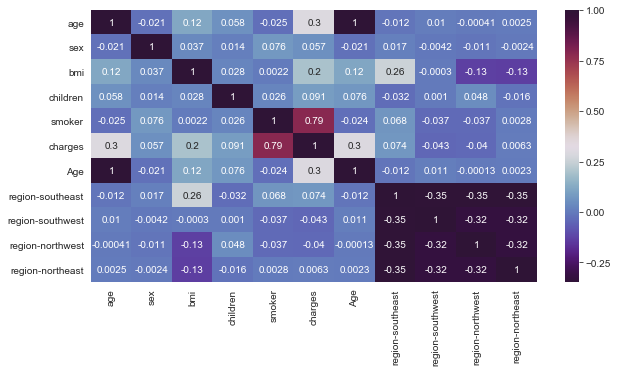

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="twilight_shifted")

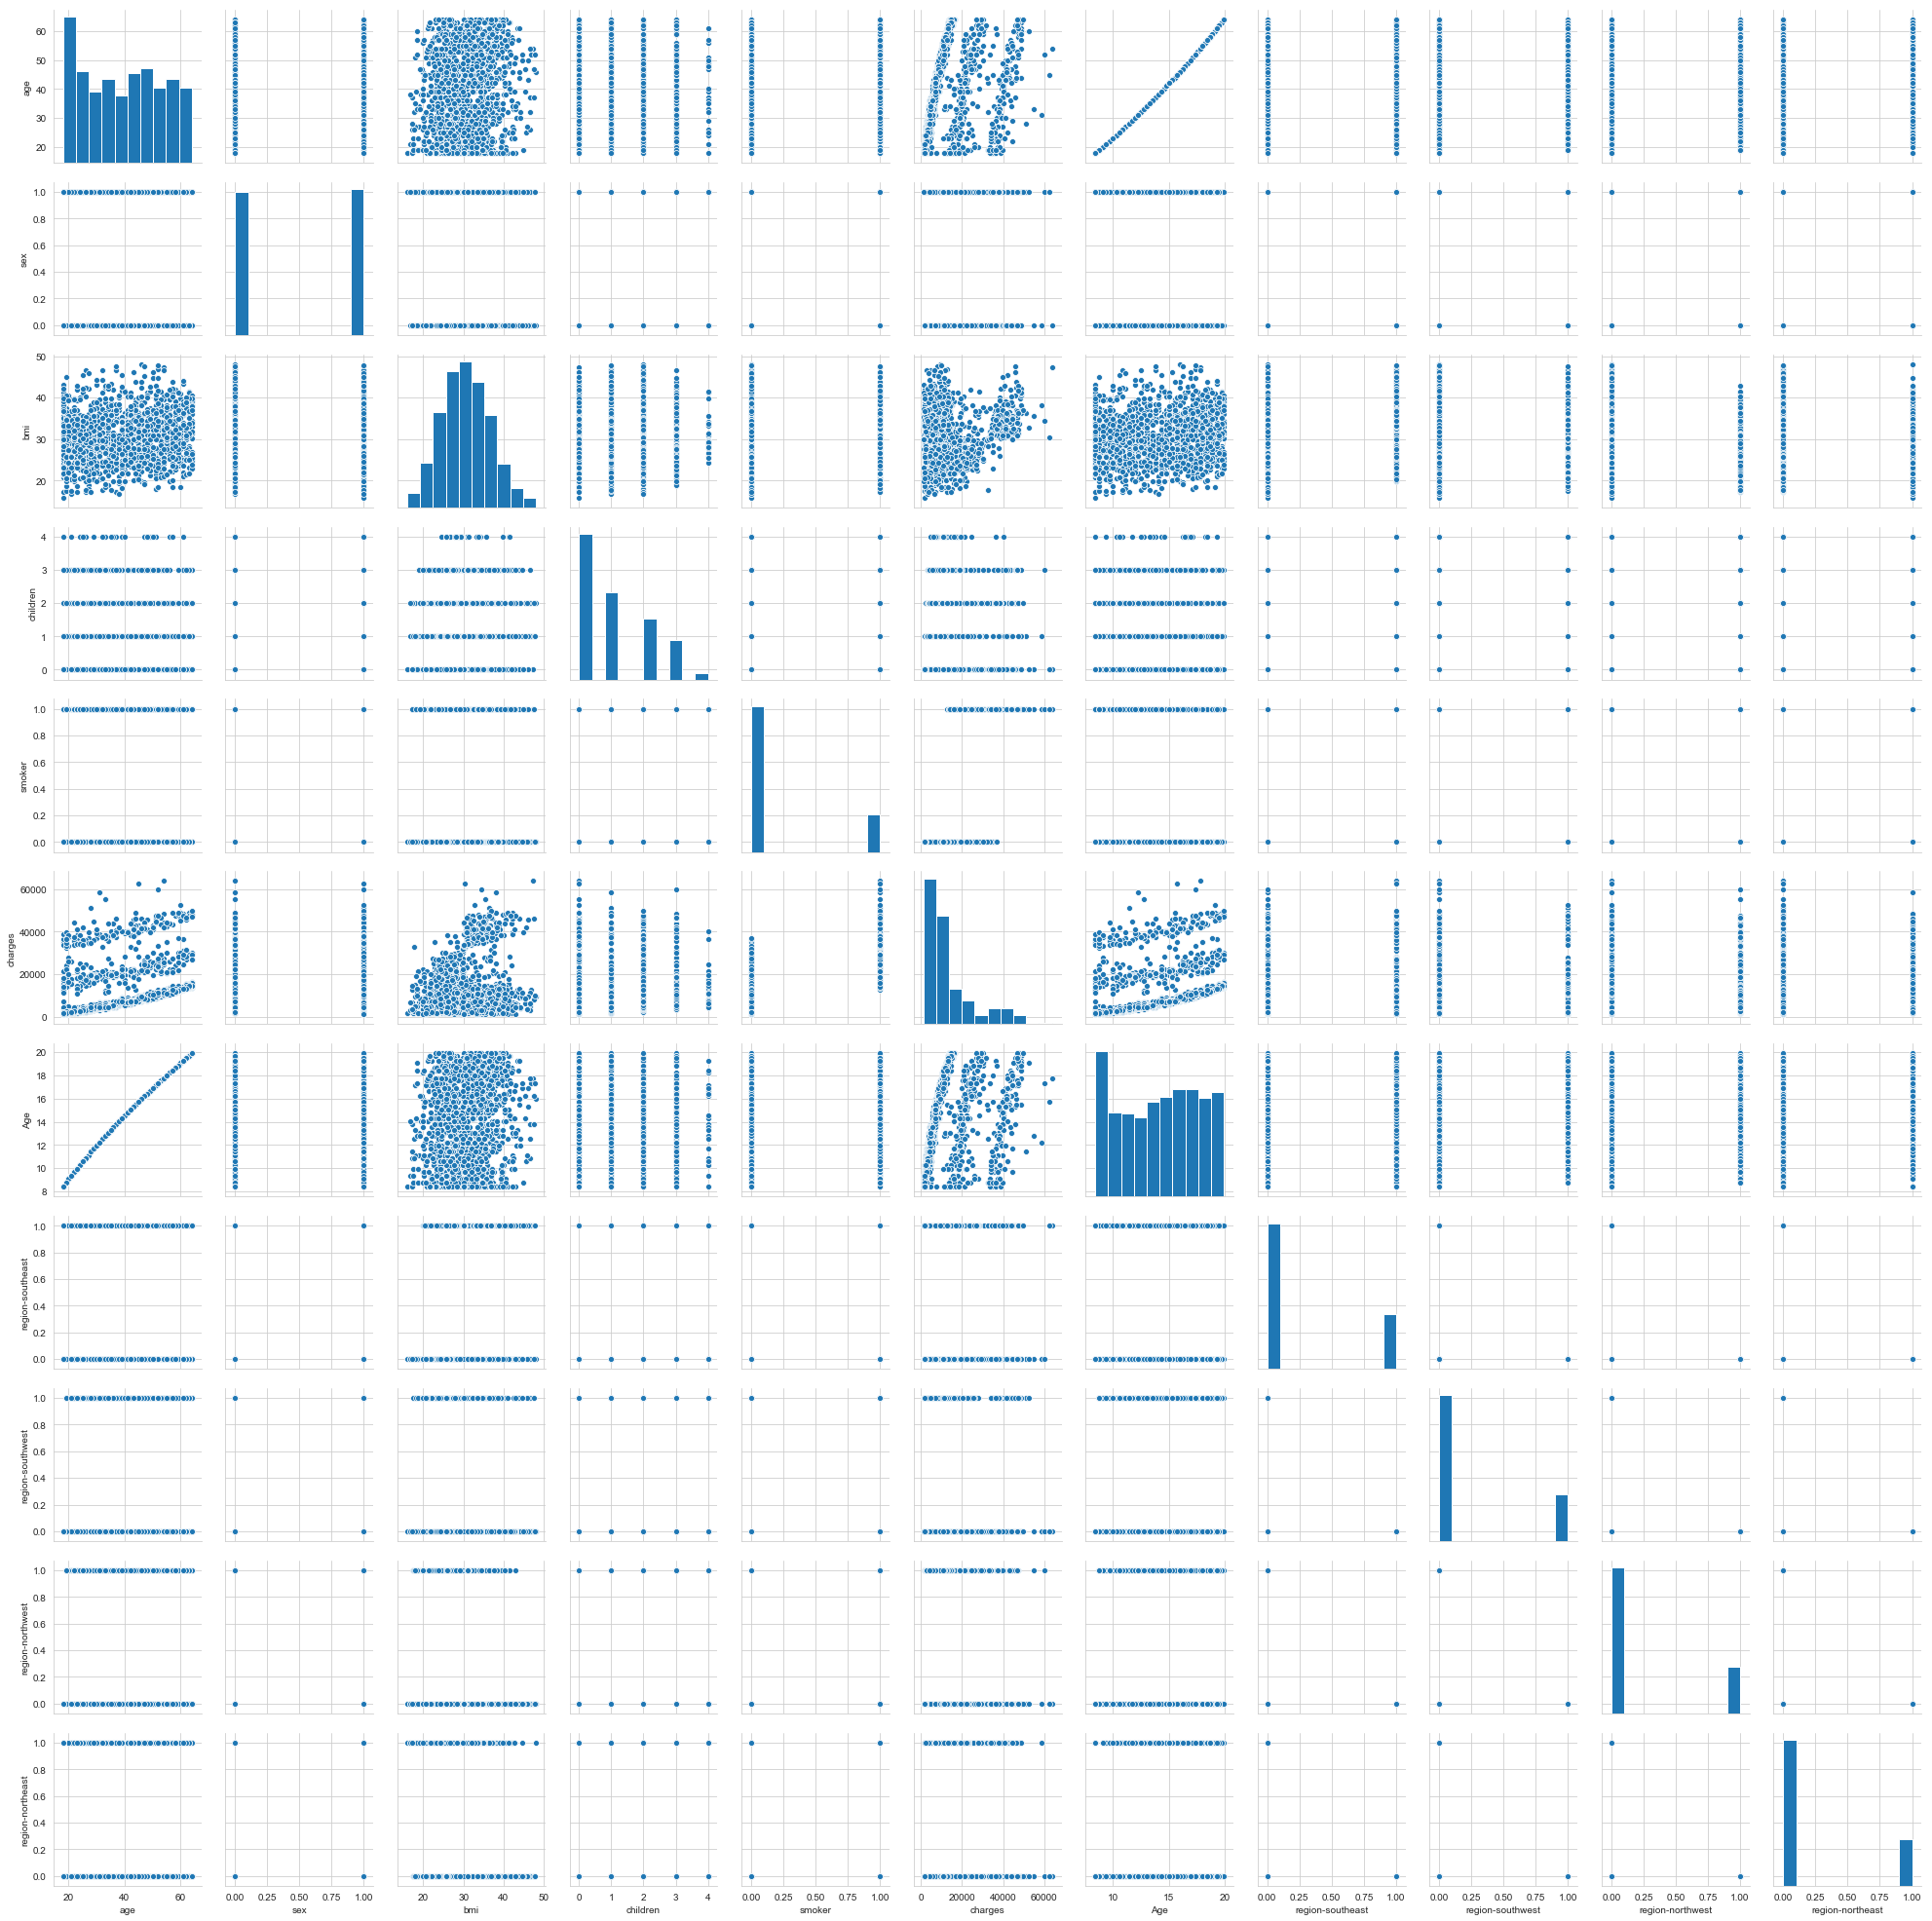

In [53]:
sns.pairplot(df)

In [54]:
data=df.drop(["Age"],axis=1)
data.to_csv(r'data.csv', index = False)
data["charges"]=df["charges"]

In [55]:
data.head()

,age,sex,bmi,children,smoker,region,charges,region-southeast,region-southwest,region-northwest,region-northeast
0,19,0,27.900,0,1,southwest,16884.92400,0,1,0,0
1,18,1,33.770,1,0,southeast,1725.55230,1,0,0,0
2,28,1,33.000,3,0,southeast,4449.46200,1,0,0,0
3,33,1,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,0,0,1,0


In [56]:
x=df.drop(["charges","region","Age"],axis=1)
y=df["charges"]
x.head()

,age,sex,bmi,children,smoker,region-southeast,region-southwest,region-northwest,region-northeast
0,19,0,27.900,0,1,0,1,0,0
1,18,1,33.770,1,0,1,0,0,0
2,28,1,33.000,3,0,1,0,0,0
3,33,1,22.705,0,0,0,0,1,0
4,32,1,28.880,0,0,0,0,1,0


In [57]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [58]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10,random_state=0)

In [59]:
sc=StandardScaler()

In [60]:
#train_x=sc.fit_transform(train_x)
#test_x=sc.fit_transform(test_x)

# Model_Selection

In [61]:
Reg=RandomForestRegressor(n_estimators=400)

In [62]:
Reg.fit(train_x,train_y)
pred_y=Reg.predict(test_x)

In [63]:
print(Reg.score(train_x,train_y)*100)
print(Reg.score(test_x,test_y)*100)

97.54423509193877
90.18507549009584


In [64]:
pre=[28,1,33.000,3,0,1,0,0,0]

In [65]:
pre1=Reg.predict([pre])

In [66]:
print(pre1)

[4944.54420403]


# Model_Evaluation

RandomizedSearchCv

In [67]:
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

In [68]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110,None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 500,100,400,200, 300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse']
}

In [69]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(Reg, param_distributions=param_grid,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(Reg,param_grid, 40,train_x, train_y)

In [70]:
rf_ht_score

0.8458635427392428

In [71]:
rf_parameters

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'mse',
 'bootstrap': True}

In [72]:
Reg1=RandomForestRegressor(n_estimators=200,
                             min_samples_split= 10,
                             min_samples_leaf= 5,
                             max_features= 'auto',
                                 max_depth= 5,
                             criterion= 'mse',
                                 bootstrap= True)

In [73]:
Reg1.fit(train_x,train_y)
pred_y1=Reg1.predict(test_x)

In [74]:
print(Reg1.score(train_x,train_y)*100)
print(Reg1.score(test_x,test_y)*100)

87.49386946962747
92.52607807796234


In [75]:
print("Accuracy Of Model: {}".format(r2_score(test_y,pred_y1)*100) ) 

Accuracy Of Model: 92.52607807796234
